In [3]:
import json

with open('synthetic_overlap.json', 'r') as json_file:
    all_data = json.load(json_file)
data = all_data
len(data)

4

In [4]:
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
from matplotlib import pyplot as plt
from shapely.ops import unary_union

# load all points to one stack
pop_list = []
merged_polygons = []
sample_element = data[0]
for i, sample in enumerate(data):
    curr_x = max([sublist[0] for sublist in sample['points']])
    curr_y = max([sublist[1] for sublist in sample['points']])
    for j in range(i+1, len(data)-1):
        given_x = max([sublist[0] for sublist in data[j]['points']])
        given_y = max([sublist[1] for sublist in data[j]['points']])
        if given_x < curr_x+100 and given_y < curr_y + 100:
            if Polygon(sample['points']).intersects(Polygon(data[j]['points'])):
                merged_polygon = unary_union(
                    [Polygon(sample['points']),
                     Polygon(data[j]['points'])])
                merged_polygons.append(merged_polygon)
                if i not in pop_list:
                    pop_list.append(i)
                if j not in pop_list:
                    pop_list.append(j)


def remove_indexes(lst, indexes):
    # Sort the indexes in descending order
    indexes.sort(reverse=True)

    # Remove the elements at the specified indexes
    for index in indexes:
        if 0 <= index < len(lst):
            del lst[index]

    return lst


new_list = remove_indexes(data, pop_list)

# convert all the data in merged_polygons to json
if merged_polygons:
    for elements in merged_polygons:
        rlist = list(elements.exterior.coords)
        sample_element['points'] = rlist
        data.append(sample_element)

print('number of merged elements ', len(merged_polygons))

number of merged elements  2


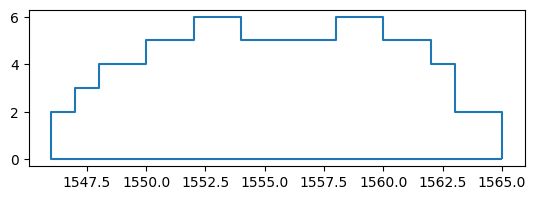

In [159]:
import geopandas as gpd
gpd.GeoSeries(merged_polygons).boundary.plot()
plt.show()

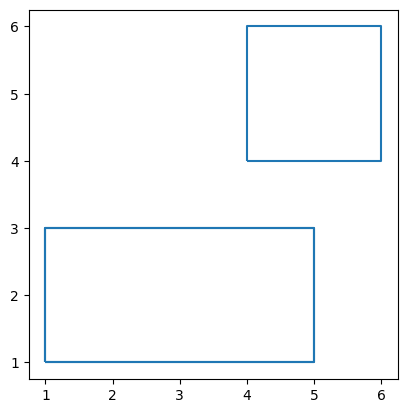

In [129]:
import geopandas as gpd
p1 = Polygon(data[0]['points'])
p2 = Polygon(data[1]['points'])
p3 = Polygon(data[2]['points'])
# # plot them
gpd.GeoSeries([p1, p2, p3]).boundary.plot()
plt.show()
# Polygon(data[2]['points'])

In [130]:
len(all_data)

3

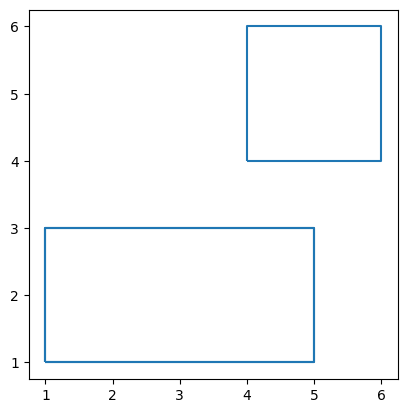

In [132]:
# # plot them
import geopandas as gpd
p1 = Polygon(all_data[0]['points'])
p2 = Polygon(all_data[1]['points'])
p3 = Polygon(all_data[2]['points'])
gpd.GeoSeries([p1, p2, p3]).boundary.plot()
plt.show()

In [ ]:
# convert all the data in merged_polygons to json
if merged_polygons:
    for elements in merged_polygons:
        rlist = list(elements.exterior.coords)
        sample_element['points'] = rlist
        data.append(sample_element)

In [ ]:
# # plot them
import geopandas as gpd
p1 = Polygon(data[0]['points'])
p2 = Polygon(data[1]['points'])
gpd.GeoSeries([p1, p2]).boundary.plot()
plt.show()

In [142]:
data[-1]

{'type': 'polyline',
 'points': [(1565.0, 0.0, 0.0),
  (1546.0, 0.0, 0.0),
  (1546.0, 2.0, 0.0),
  (1547.0, 2.0, 0.0),
  (1547.0, 3.0, 0.0),
  (1548.0, 3.0, 0.0),
  (1548.0, 4.0, 0.0),
  (1550.0, 4.0, 0.0),
  (1550.0, 5.0, 0.0),
  (1552.0, 5.0, 0.0),
  (1552.0, 6.0, 0.0),
  (1554.0, 6.0, 0.0),
  (1554.0, 5.0, 0.0),
  (1558.0, 5.0, 0.0),
  (1558.0, 6.0, 0.0),
  (1560.0, 6.0, 0.0),
  (1560.0, 5.0, 0.0),
  (1562.0, 5.0, 0.0),
  (1562.0, 4.0, 0.0),
  (1563.0, 4.0, 0.0),
  (1563.0, 2.0, 0.0),
  (1565.0, 2.0, 0.0),
  (1565.0, 0.0, 0.0)],
 'closed': True,
 'fillColor': 'rgba(0,0,0,0)',
 'lineColor': 'rgb(0,255,0)'}

In [24]:
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
from matplotlib import pyplot as plt
from shapely.ops import unary_union
from shapely.validation import make_valid

a = [[7224.34, 5902.22, 0.0], [7223.02, 5903.55, 0.0], [7223.02, 5907.53, 0.0], [7221.69, 5907.53, 0.0], [7221.69, 5910.18, 0.0], [7223.02, 5910.18, 0.0], [7223.02, 5915.49, 0.0], [7224.34, 5915.49, 0.0], [7224.34, 5918.14, 0.0], [7223.02, 5918.14, 0.0], [7223.02, 5919.47, 0.0], [7220.36, 5919.47, 0.0], [7220.36, 5918.14, 0.0], [7217.71, 5918.14, 0.0], [7217.71, 5915.49, 0.0], [7216.39, 5915.49, 0.0], [7216.39, 5912.84, 0.0], [7213.74, 5912.84, 0.0], [7213.74, 5911.51, 0.0], [7212.41, 5911.51, 0.0], [7212.41, 5908.86, 0.0], [7211.08, 5908.86, 0.0], [7211.08, 5907.53, 0.0], [7212.41, 5907.53, 0.0], [7212.41, 5904.88, 0.0], [7215.06, 5904.88, 0.0], [7215.06, 5903.55, 0.0], [7216.39, 5903.55, 0.0], [7216.39, 5904.88, 0.0], [7221.69, 5904.88, 0.0], [7221.69, 5903.55, 0.0], [7223.02, 5903.55, 0.0], [7224.34, 5902.22, 0.0]]
b = [[7224.34, 5902.82, 0.0], [7223.02, 5902.82, 0.0], [7223.02, 5908.12, 0.0], [7221.69, 5908.12, 0.0], [7221.69, 5910.77, 0.0], [7223.02, 5910.77, 0.0], [7223.02, 5916.07, 0.0], [7224.34, 5916.07, 0.0], [7224.34, 5918.72, 0.0], [7223.02, 5918.72, 0.0], [7223.02, 5920.04, 0.0], [7220.36, 5920.04, 0.0], [7220.36, 5918.72, 0.0], [7217.71, 5918.72, 0.0], [7217.71, 5916.07, 0.0], [7216.39, 5916.07, 0.0], [7216.39, 5913.42, 0.0], [7215.06, 5913.42, 0.0], [7215.06, 5912.09, 0.0], [7212.41, 5912.09, 0.0], [7212.41, 5909.44, 0.0], [7211.08, 5909.44, 0.0], [7211.08, 5908.12, 0.0], [7212.41, 5908.12, 0.0], [7212.41, 5905.47, 0.0], [7215.06, 5905.47, 0.0], [7215.06, 5904.14, 0.0], [7221.69, 5904.14, 0.0], [7221.69, 5902.82, 0.0], [7224.34, 5902.82, 0.0]]

p1 = Polygon(a)
p2 = Polygon(b)
p3 = p2.buffer(0)

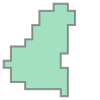

In [25]:
p3

In [18]:
for i in p3.geoms:
    print(i)

POLYGON Z ((7221.69 5902.82 0, 7221.69 5904.14 0, 7215.06 5904.14 0, 7215.06 5905.47 0, 7212.41 5905.47 0, 7212.41 5908.12 0, 7211.08 5908.12 0, 7211.08 5909.44 0, 7212.41 5909.44 0, 7212.41 5912.09 0, 7215.06 5912.09 0, 7215.06 5913.42 0, 7216.39 5913.42 0, 7216.39 5916.07 0, 7217.71 5916.07 0, 7217.71 5918.72 0, 7220.36 5918.72 0, 7220.36 5920.04 0, 7223.02 5920.04 0, 7223.02 5918.72 0, 7224.34 5918.72 0, 7224.34 5916.07 0, 7223.02 5916.07 0, 7223.02 5910.77 0, 7221.69 5910.77 0, 7221.69 5908.12 0, 7223.02 5908.12 0, 7223.02 5902.82 0, 7221.69 5902.82 0))
LINESTRING Z (7224.34 5902.82 0, 7223.02 5902.82 0)


In [ ]:
# for j in range(i+1, len(data)-1):
#     if i >= len(data): break
#     if Polygon(sample['points']).intersection(Polygon(data[j]['points'])):
#         merged_polygon = unary_union(Polygon(sample['points']),Polygon(data[j]['points']))
#         merged_polygons.append(merged_polygon)
#         print('merged',i,j)

#         if j not in pop_list: pop_list.append(j)
#         if i not in pop_list: pop_list.append(i)
# print('sample ', i)

In [28]:
a = 0
b = 2
if a==1 and b==2:
    print('hi')